In [1]:
#import relevant libraries for this modelling
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error
import sklearn
from math import sqrt

In [2]:
#read the dataset and create a pandas dataframe
adverts = pd.read_csv('Advertising.csv')
adverts.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
adverts.shape

(200, 5)

# DATA PREPROCESSING AND MANIPULATION

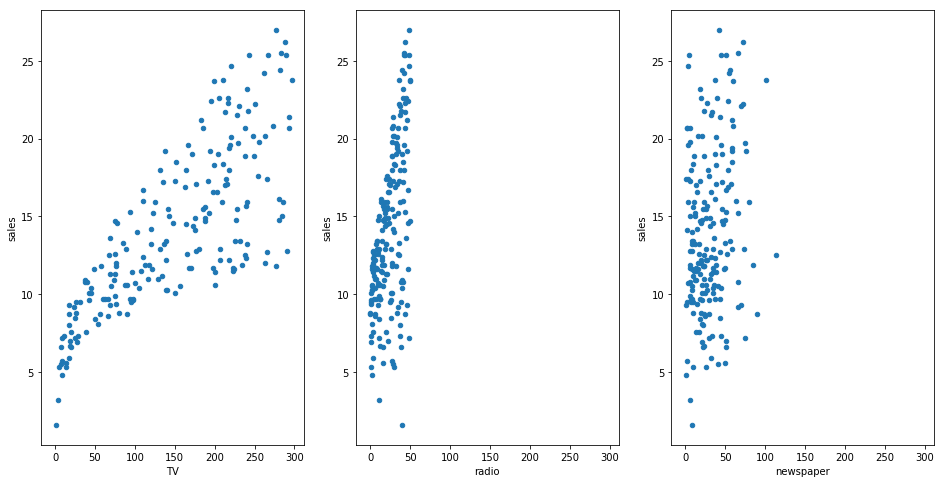

In [4]:
#examining the relationship between sales and the mediums of advertisement using a scatter plot
fig,ax = plt.subplots(1,3,sharex= True)
adverts.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = ax[0], figsize = (16,8))
adverts.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = ax[1])
adverts.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = ax[2])

In [5]:
#applying linear regression analysis to estimate the relationship between TV, radio, newspapers and sales
feature = adverts[['TV','radio','newspaper']]
target = adverts['sales']
#import the linearRegression module from linear model
from sklearn.linear_model import LinearRegression
#instantiate a model estimator
linreg = LinearRegression()

In [6]:
#import train_test split from model selection sub-package
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state = 12)
#fit the train data into the model estimato
lm = linreg.fit(x_train, y_train)

In [7]:
#retrieve the interept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.0510623366409586
[ 0.04447126  0.19333577 -0.0034379 ]


In [8]:
#run a prediction using the test data
y_pred = lm.predict(x_test)

In [9]:
#perform accuracy check(option one) 
#obtain the rmse
import numpy as np
print('rmse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
#obtain the r squared value
print('R-squared: ', r2_score(y_test, y_pred))

rmse:  1.6507480849423515
R-squared:  0.9074967628613594


In [10]:
#import stats model library(option two)
import statsmodels.formula.api as smf
#fit the regression model
lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = adverts).fit()
#inspect the confidence intervalfor each variable
print(lm.conf_int())
#inspect result
print(lm.summary())

                  0         1
Intercept  2.323762  3.554016
TV         0.043014  0.048516
radio      0.171547  0.205513
newspaper -0.012616  0.010541
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 12 May 2020   Prob (F-statistic):           1.58e-96
Time:                        20:39:07   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

In [11]:
#using the elasticnet(which combine the strength of lasso and ridge) regression to improve/optimize our mulitple regression linear model sales-advertising data
#the aim is to address over fitting problems associated with our model
from sklearn.linear_model import ElasticNet
#create a model estimator
elastic = ElasticNet(alpha = 0.00001, normalize= True)
#fit the train data
elastic.fit(x_train, y_train)
#make predictions
y_pred = elastic.predict(x_test)
#carry out accuracy check
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared: ', r2_score(y_test, y_pred))

RMSE:  1.6511275987182543
R squared:  0.9074542242224647


In [12]:
#analyzing only radio ads spendings with sales
new = ['radio']
radio = adverts[new]
Sales_target = adverts.sales
x_train, x_test, y_train, Y_test = train_test_split(radio, Sales_target, random_state = 12)
lm3 = linreg.fit(x_train, y_train)
y_prd = lm3.predict(x_test)

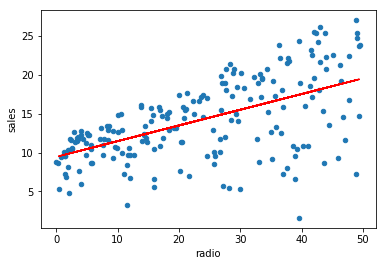

In [13]:
#plot the relationship between sales and adio ads using a scatter plot and the regression line
adverts.plot(kind = 'scatter', x = 'radio', y = 'sales')
plt.plot(x_test, y_prd, c = 'red', )
##the straight represents the best fit line, i.e., the regressor

In [14]:
#computing the statistical results uins stats model ols method
A = smf.ols(formula = 'sales ~ radio', data = adverts).fit()
print(A.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 12 May 2020   Prob (F-statistic):           4.35e-19
Time:                        20:39:08   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

In [15]:
##the above result shows us a very low R squared value. this is so because our number of dependent feature was reduced.
#obtain confidence interval
print(A.conf_int())

                  0          1
Intercept  8.201588  10.421688
radio      0.162244   0.242747


In [16]:
print(A.pvalues)# this correspond to the values on the ols tatble

Intercept    3.561071e-39
radio        4.354966e-19
dtype: float64
